**Note:** most of the code is extracted from https://cameo.bio/05-predict-gene-knockout-strategies.html#optknock

Both OptKnock and OptGene are algorithms that try to identify knock out targets which optimize metabolic flux towards a target metabolite by coupling production to growth.

# **Initial model**

In [1]:
# load dependencies
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cobra.io import read_sbml_model
from cameo import phenotypic_phase_plane
plotter = PlotlyPlotter()

In [2]:
# Read the model
model = read_sbml_model('../models/Adjusted_models/iMT1026-v3_MalonicAcid.xml')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-13


In [3]:
# Change carbon source to methanol
medium = model.medium
medium['Ex_glyc'] = 0
medium['Ex_meoh'] = 10
model.medium = medium

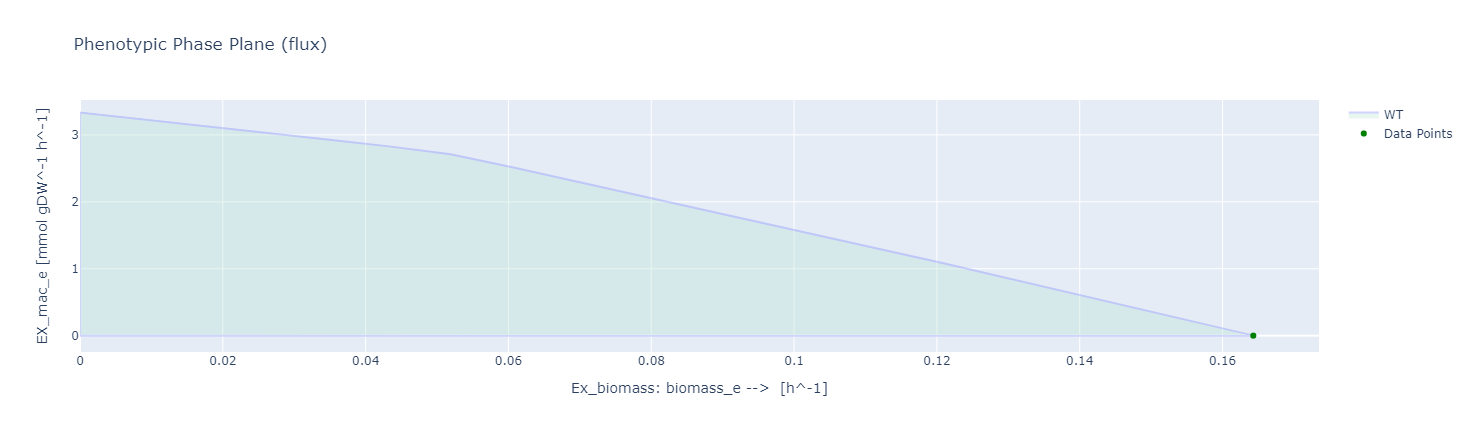

In [12]:
# Visualize the initial phenotypic phase plane
init_solution = model.optimize()
growth = init_solution.fluxes['Ex_biomass']
malonicAcid_production = init_solution.fluxes['mac_etoEX']
p = phenotypic_phase_plane(model, variables=['Ex_biomass'], objective='EX_mac_e')
p.plot(plotter, points=[(growth, malonicAcid_production)])

# OptGene

In [5]:
# Load dependencies
from cameo.strain_design import OptGene

In [11]:
model.reactions.EX_mac_e

Reaction identifier,EX_mac_e
Name,
Memory address,0x029ff54b5670
Stoichiometry,malonic_acid_e --> -->
GPR,
Lower bound,0
Upper bound,1000.0


In [6]:
# The analysis
optgene = OptGene(model)

result = optgene.run(target=model.reactions.mac_etoEX,    # What to produce
                     biomass=model.reactions.Ex_biomass, # Initial optimization
                     substrate=model.metabolites.meoh_e, # Carbon source
                     max_evaluations=20000,
                     population_size=200,
                     max_knockouts=2,
                     plot=False,
                     growth_coupled=True)

Starting optimization at Tue, 16 Nov 2021 10:39:45


C:\Users\abele\AppData\Local\Programs\Python\Python39\lib\site-packages\cameo\strain_design\heuristic\evolutionary\objective_functions.py:286: RuntimeWarning:

invalid value encountered in double_scalars



HBox()

Finished after 00:18:06


In [8]:
result

,reactions,genes,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness
